Goal: Here our goal is to predict the employee attrition:

Description: "Attrition" is a major problem for every organization. Here we predict that how HR Analytics analyze the employee
             attrition?

# Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
%matplotlib inline
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
#from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import LinearSVC , SVC

from sklearn.ensemble import  RandomForestClassifier , GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore") 

# Data Collection:

In [2]:
Attrition_data = pd.read_csv("HR-Employee.csv")

In [3]:
Attrition_data.head(7)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0


# What are the Columns?

In [4]:
Attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Observation: 1) Here we can see that the dataset consists of the general data of the employee , professional data of the employe ,
# personal data of the employee and are combined to analyze the attrition of the employee.
#              2) Here our target column is "Attrition".

# Size of the data:

In [6]:
Attrition_data.shape

(1470, 35)

In [7]:
# Observation: Here we can see that there are : Rows - 1470 , Columns - 35.

# What are the different datatypes present?

In [8]:
Attrition_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
# Observation: Here we can see that the major columns are with the datatype: "int64" and there are few columns with the "object"
# datatype.

# Information of the data:

In [10]:
Attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
# Observation: Here we can see that there are no null values in any of the columns.

# Statistical Analysis of the data:

In [12]:
Attrition_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# Observation: 1) Here we can see that the numerical columns are considered. we can see that these columns are with absolute count.
# 2) Also we can see that the difference between "mean and std" is more in many of the columns but in few columns it is less.
# 3) Also in few columns the minimum value is "0".

# Checking with the null values in the data:

In [14]:
Attrition_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
# Observation: here we can see that this code checked the complete null values in all the columns including object datatype 
# columns and we can see that no null values in any of the columns.

In [16]:
# Also can see the null/missing values:

Attrition_data.isnull().values.any()

False

# Checking the Count of our label: "Attrition" :

In [17]:
Attrition_count = pd.DataFrame(Attrition_data["Attrition"].value_counts())

In [18]:
Attrition_count

,Attrition
No,1233
Yes,237


In [19]:
# Observation: Here we can see that : The employees attritioned - 237
#                                     The employees who have not attritioned - 1233.

# Removing the unrequired columns:

In [20]:
Attrition_data = Attrition_data.drop(["EmployeeCount" , "EmployeeNumber" , "Over18", "StandardHours"] , axis = 1)

In [21]:
Attrition_data.shape

(1470, 31)

In [22]:
# Observation: here we can see that the number of columns are reduced to 32,that means we have successfully dropped our unrequired columns.

# Visualization:

## Univariate Analysis:

### Plot of our target variable : "Attrition"

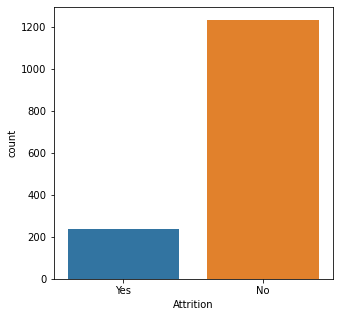

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.Attrition);

In [24]:
# Observation : Here we can see that there are employees with attrition - yes in "blue" color and there are employees with
# attrition - no in the othet color.

In [25]:
Attrition_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Age:

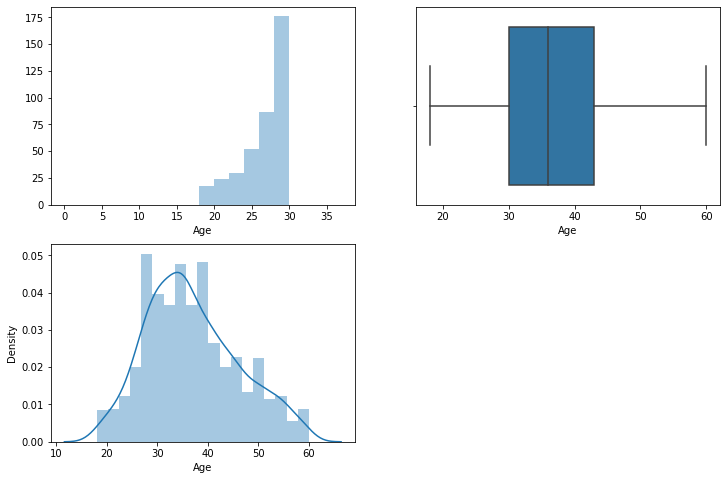

In [26]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['Age'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['Age']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['Age']);

In [27]:
# Observation: Here we can see that the graph is almost distributed normally and also we can see that there are no outliers 
# detected.

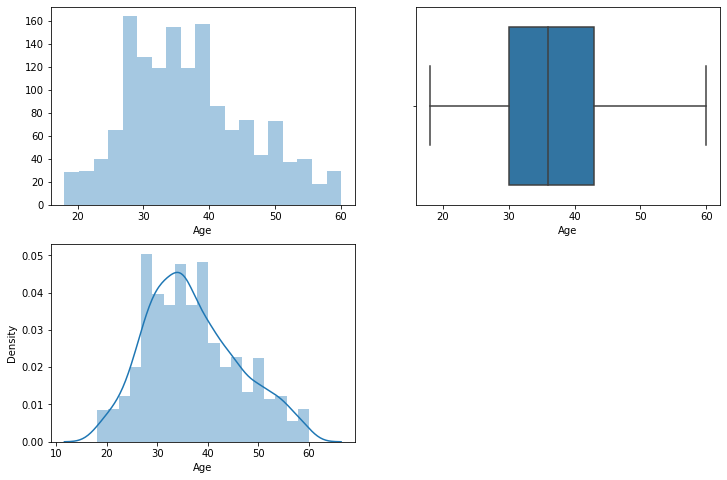

In [28]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['Age'], kde=False);#, #bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['Age']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['Age']);

# BusinessTravel:

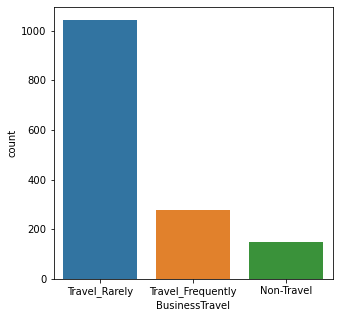

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.BusinessTravel);

In [30]:
# Observation: Here we can see that there are more number of employees who "Travel_Rarely" and the order is followed by, who
# "Travel frequently Bussiness travel" and finally by, who "Non - Travel" ie., who dont travel.

In [31]:
Attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# DailyRate:

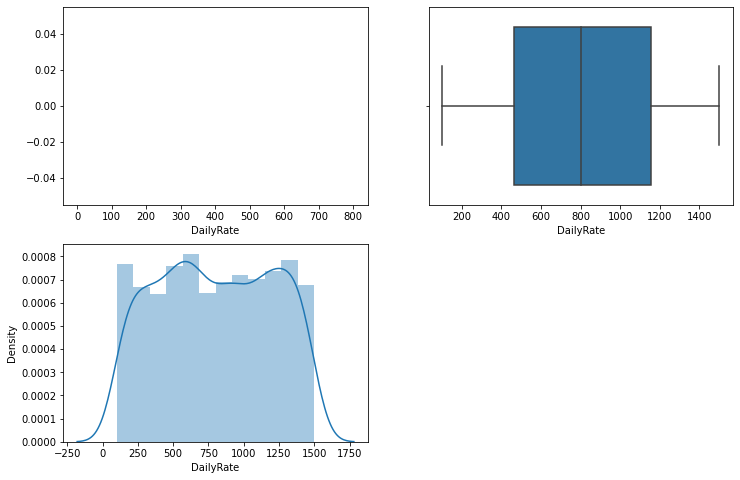

In [32]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['DailyRate'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['DailyRate']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['DailyRate']);

In [33]:
# Observation: here we can see that the distribution curve is broad and seems to be distributed almsot normally and also we can
# see that there are no outliers in the boxplot.

# Department:

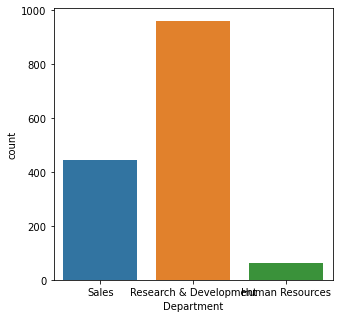

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.Department);

In [35]:
# Observation: Here we can see that "research and Development" bar is higher than the other bars and least one is "Human Resources"

# DistanceFromHome:

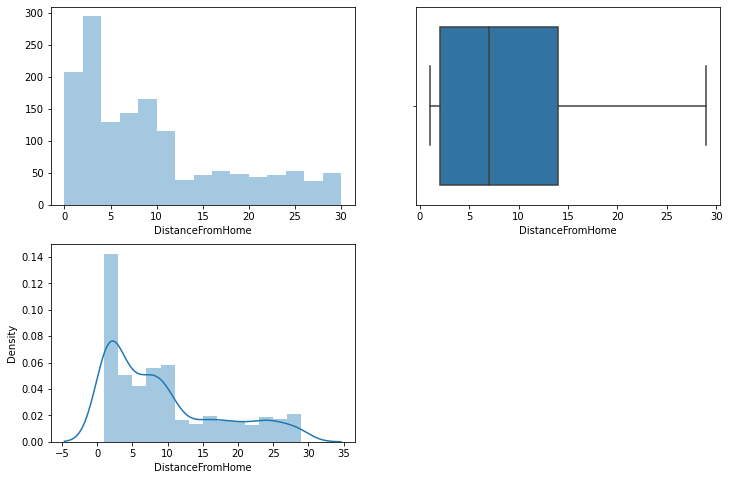

In [36]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['DistanceFromHome'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['DistanceFromHome']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['DistanceFromHome']);

In [37]:
# Observation: Here we can see that there no outliers present in the boxplot but the distribution curve is not at all normall and
# is skewed towards right and so it is right skewed due to which boxplot is onesided.

# Education:

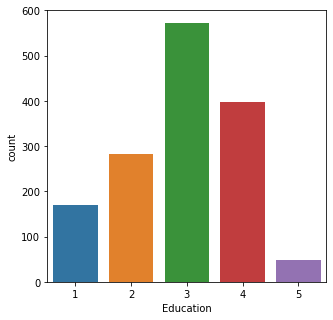

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.Education);

In [39]:
# observation: here we can see that the high count of the education is seen in "Category - 3" and the least is seen in "category - 5"

# EducationField:

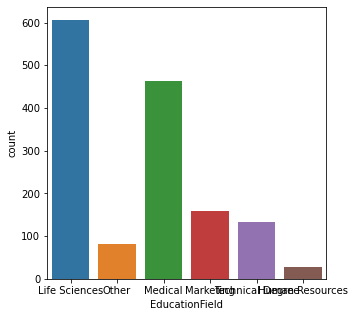

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.EducationField);

In [41]:
# Observation: here we can see that there is highest count for the bar "Life sciences" and least one is "Human Resources".

# EnvironmentSatisfaction:

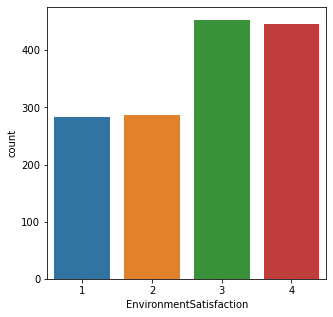

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.EnvironmentSatisfaction);

In [43]:
# Observation: Here we can see that there is high count in the "category - 3" and also we can see that category 3 & 4 are almost
# same.

# Gender:

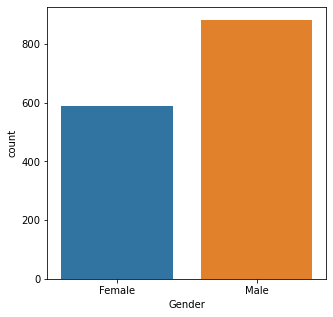

In [44]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.Gender);

In [45]:
# Observation: Here we can see that the high count is for "male" category than "Female".

# HourlyRate:

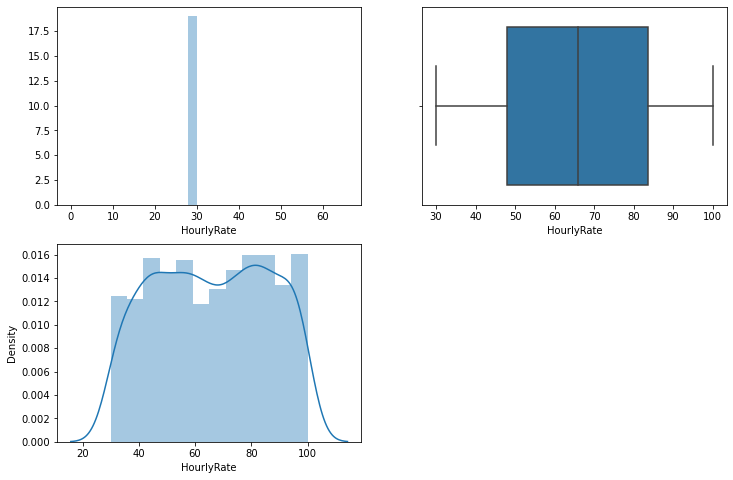

In [46]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['HourlyRate'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['HourlyRate']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['HourlyRate']);

In [47]:
# Observation: Here we can see that there are no outliers can be in the boxplot and the distribution curve is almost "normal".

# JobInvolvement:

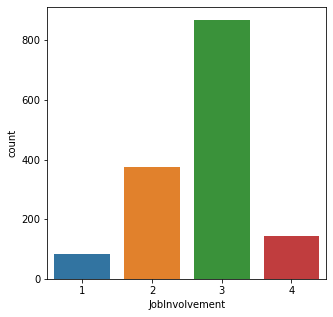

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.JobInvolvement);

In [49]:
# Observation: Here we can see that the highest count can be seen in "Category - 3" and least in "category - 1". 

# JobLevel:

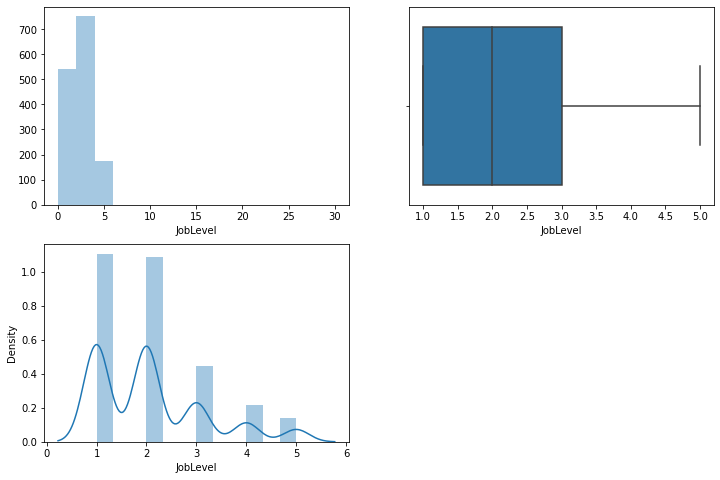

In [50]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['JobLevel'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['JobLevel']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['JobLevel']);

In [51]:
# Observation: Here we can see that there no outliers in the boxplot but also it is onesided and the distribution is not at all normal

# JobRole:

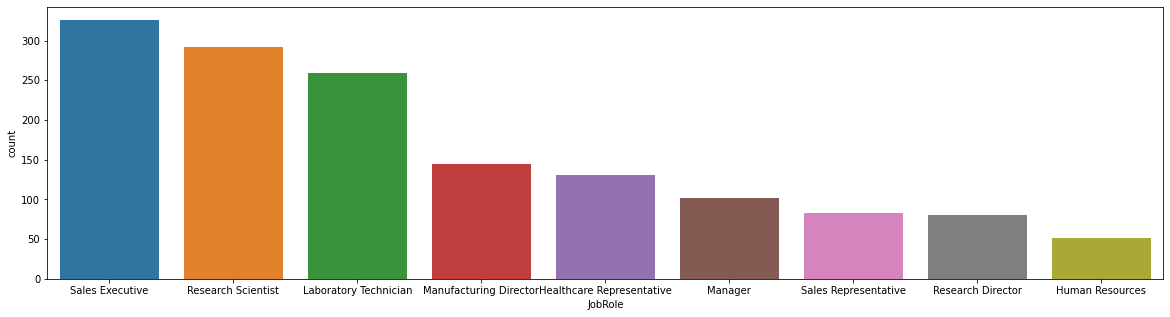

In [52]:
plt.figure(figsize=(20,5))
sns.countplot(Attrition_data.JobRole);

In [53]:
# Observation: here we can see that the high count is for the category "sales Executive"  and the least is for the "Human Resiurces".

# JobSatisfaction:

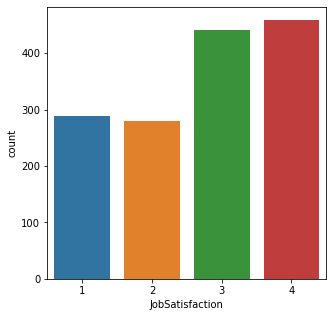

In [54]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.JobSatisfaction);

In [55]:
# Observation: Here we cna see that there are is similar to the "environment satisfaction" column and the category 3 & 4 are 
# almost similar in their count and the least one is "category - 2".

# MaritalStatus:

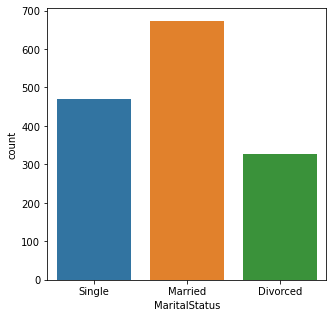

In [56]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.MaritalStatus);

In [57]:
# Observation: Here we can see that there are more number of employees who are married and the least one are divorced.

# MonthlyIncome:

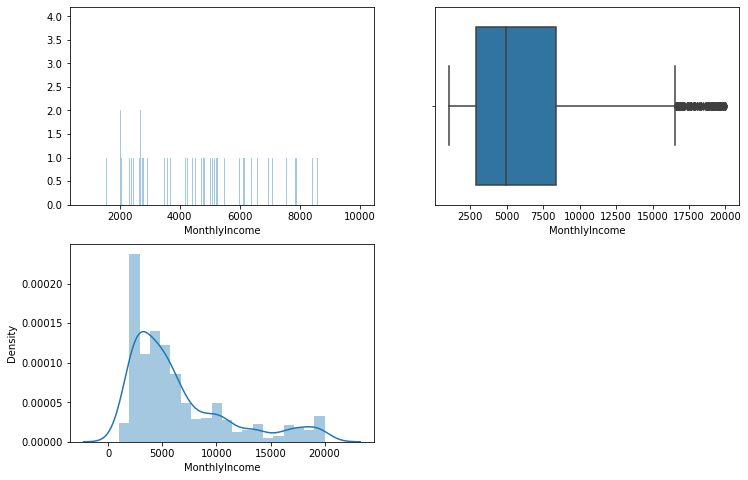

In [58]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['MonthlyIncome'], kde=False, bins=range(800, 10000, 1));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['MonthlyIncome']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['MonthlyIncome']);

In [59]:
# Observation: here we can see that there no outliers present in the boxplot and the distribution is not at all normal.

# MonthlyRate:

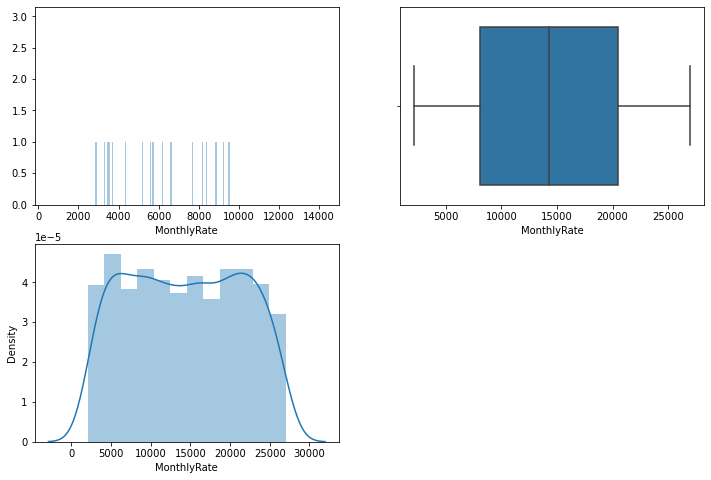

In [60]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['MonthlyRate'], kde=False, bins=range(500, 10000, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['MonthlyRate']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['MonthlyRate']);

In [61]:
# Observation: Here we can see that the boxplot has no putliers and the distribution curve is broad in the middle indicating to
# be almost normal.

# NumCompaniesWorked:

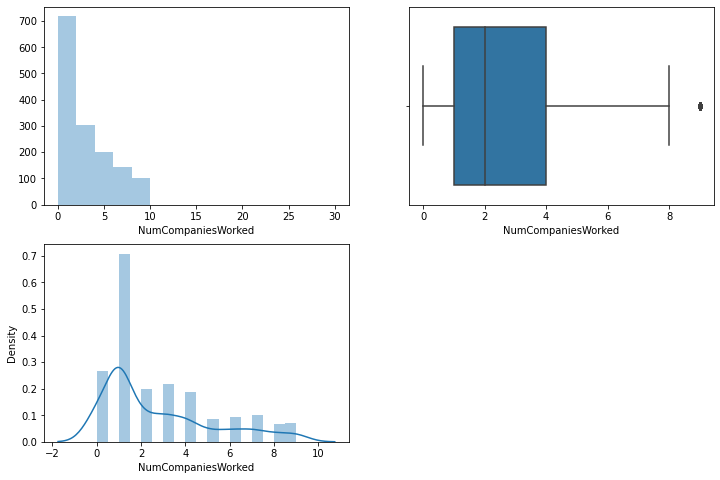

In [62]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['NumCompaniesWorked'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['NumCompaniesWorked']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['NumCompaniesWorked']);

In [63]:
# Observation : Here we can see that there is an outlier present which can be seen in boxplot but is very far from "max - quantile"
# point and so mostly our model will not be affected by it.

# OverTime:

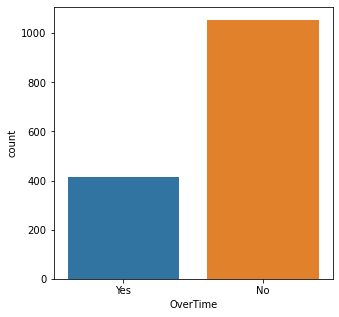

In [64]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.OverTime);

In [65]:
#  Observation: Here we can see that the "Category - No" is high when compared to "Yes". 

# PercentSalaryHike:

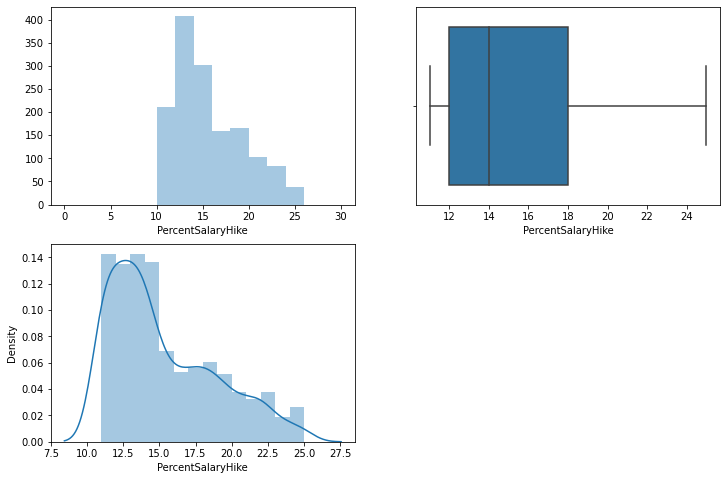

In [66]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['PercentSalaryHike'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['PercentSalaryHike']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['PercentSalaryHike']);

In [67]:
# Observation: Here we can see that the boxplot is with no outliers and the distribution curve is skewed towards right and is 
# not normal.

# PerformanceRating:

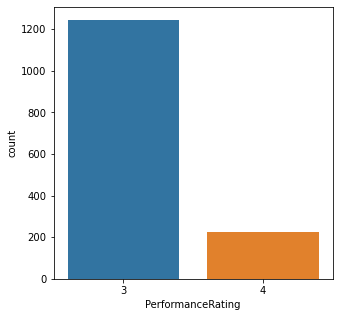

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.PerformanceRating);

In [69]:
# observattion: Here we can see that the more number of employees are with performance rating - 3 and very few with performace
# rating - 4.

# RelationshipSatisfaction:

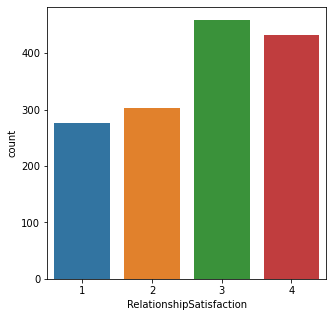

In [70]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.RelationshipSatisfaction);

In [71]:
# Observation: here we can see that the relationship satisfaction rate is high in category - 3 and least in category - 1.

# StockOptionLevel:

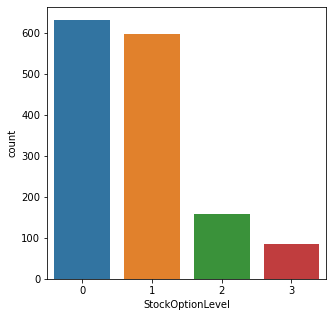

In [72]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.StockOptionLevel);

In [73]:
# observation: Here we can see that the level is more in category - 0 and least in category - 3.

# TotalWorkingYears:

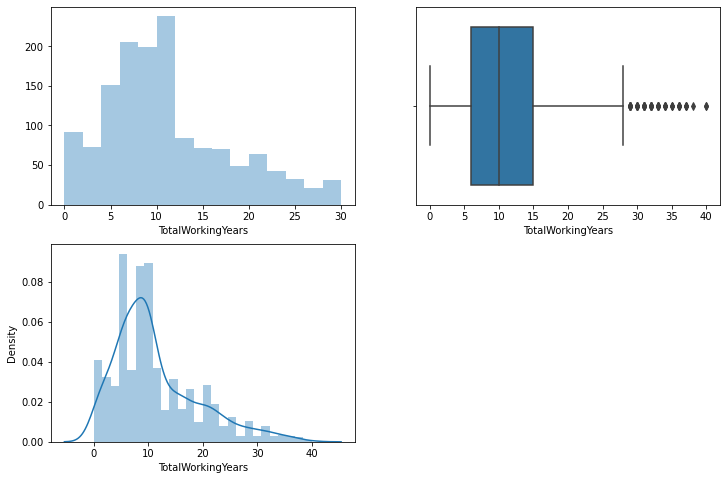

In [74]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['TotalWorkingYears'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['TotalWorkingYears']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['TotalWorkingYears']);

In [75]:
# Observation: Here we can see that there are outliers present in the boxplot at the max - quantile andthe distribution is 
# somewhat skewed.

# TrainingTimesLastYear:

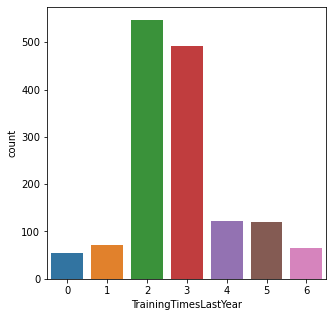

In [76]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.TrainingTimesLastYear);

In [77]:
# Observation: Here we can see that there are more number of employees who got trained 2 times last year and there are few 
# employees who did not get trained last year.

# WorkLifeBalance:

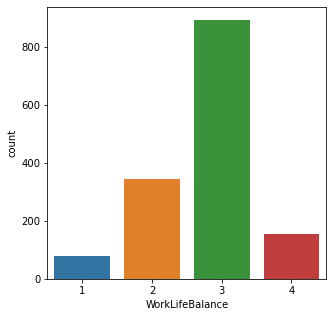

In [78]:
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.WorkLifeBalance);

In [79]:
# Observation: Here we can see that there is more count in category - 3  and least in category - 1 for Worklifebalance.

# YearsAtCompany:

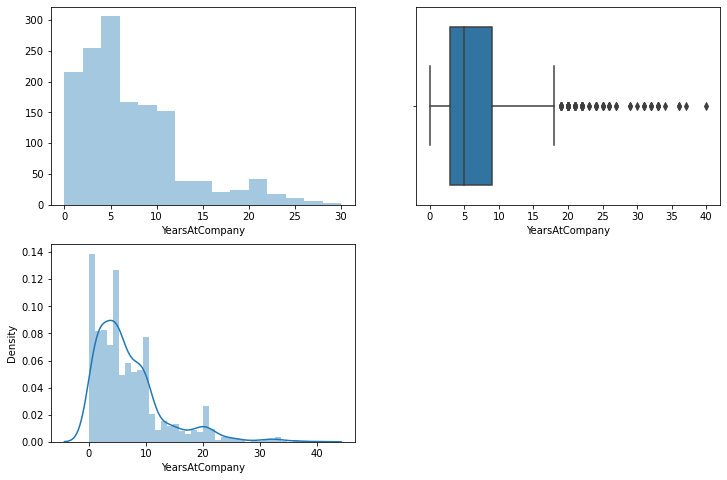

In [80]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['YearsAtCompany'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['YearsAtCompany']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['YearsAtCompany']);

In [81]:
# Observation: Here we can see that there are outliers present in the boxplot at the max - quantile andthe distribution is 
# somewhat skewed.

# YearsInCurrentRole:

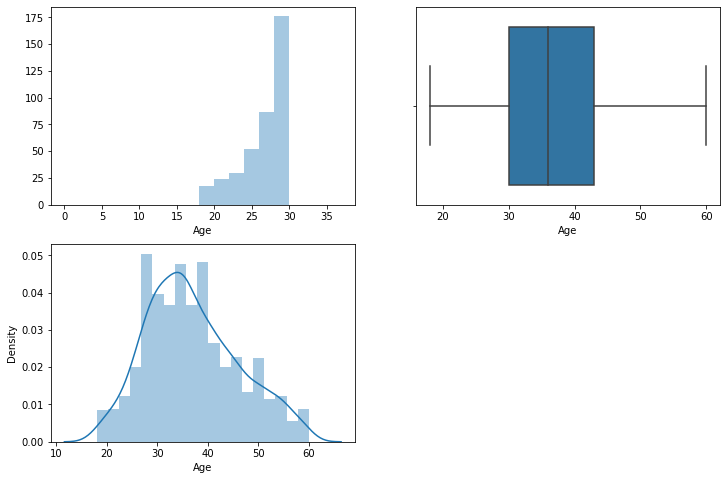

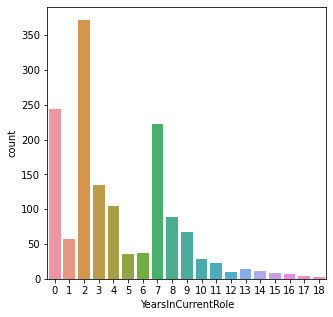

In [82]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['Age'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['Age']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['Age']);
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.YearsInCurrentRole);

In [83]:
# Observation: here we can see that there are no outliers present in the boxplot and the distribution curve seems to be normal
# and probably more number of employees are with 2 years of experience.

# YearsSinceLastPromotion:

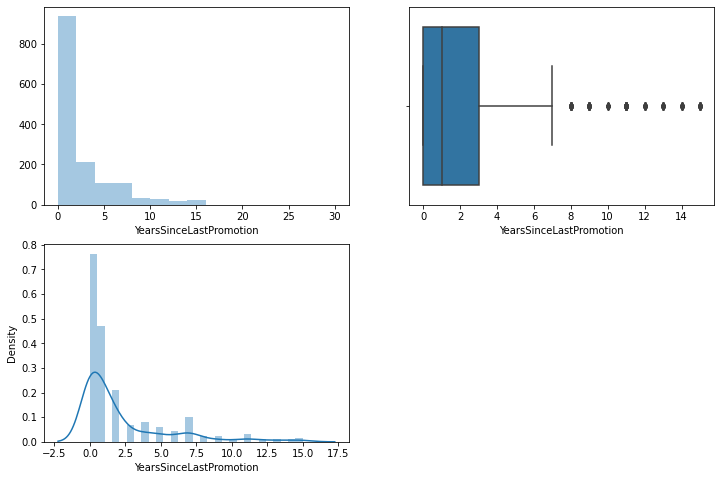

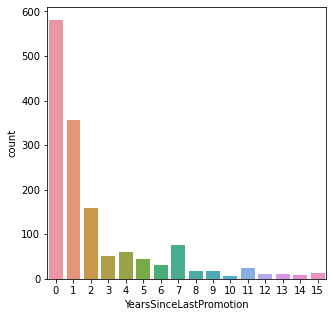

In [84]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['YearsSinceLastPromotion'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['YearsSinceLastPromotion']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['YearsSinceLastPromotion']);
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.YearsSinceLastPromotion);

In [85]:
# Observation: here we can see that there are outliers present in the boxplot and are far away from eachother and the distribution
# curve is not at all normal and there are more number of employees with no experience after getting promotion ore recently 
# promoted.

# YearsWithCurrManager:

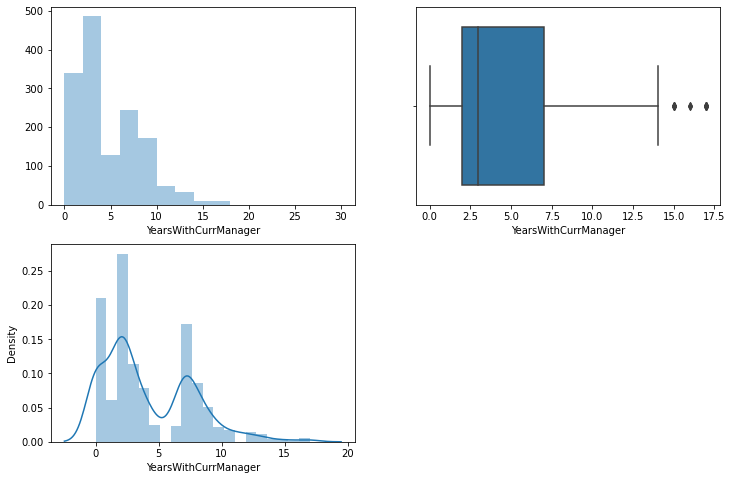

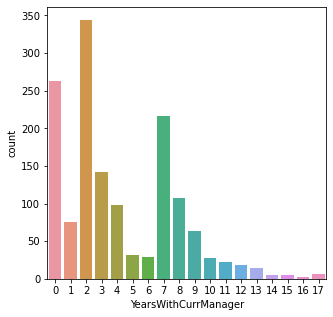

In [86]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(Attrition_data['YearsWithCurrManager'], kde=False, bins=range(0, 31, 2));
plt.subplot(2,2,2)
sns.boxplot(Attrition_data['YearsWithCurrManager']);
plt.subplot(2,2,3)
sns.distplot(Attrition_data['YearsWithCurrManager']);
plt.figure(figsize=(5,5))
sns.countplot(Attrition_data.YearsWithCurrManager);

In [87]:
# Observation: here we can see that thare are few outliers present in the boxplot and the distribution curve is with 2 peaks and
# is not at all normal and also we can see that there are more number of employees with 2 years of experience with the current 
# manager.

# Multivariate Analysis:

## correlation:

<AxesSubplot:>

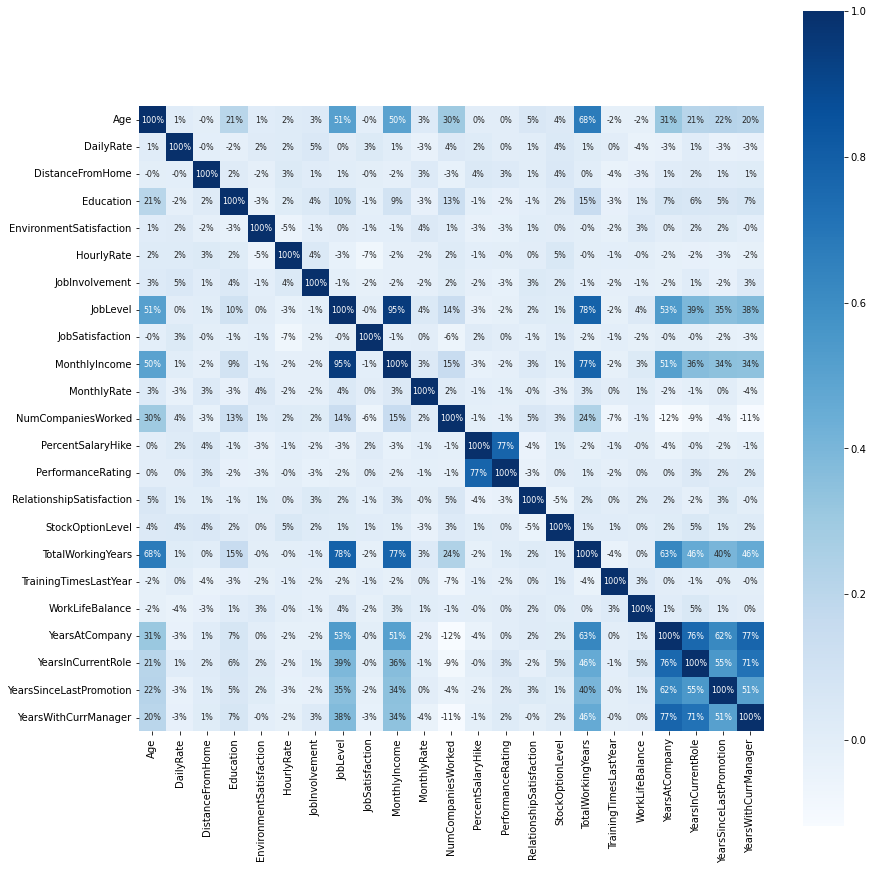

In [88]:
plt.figure(figsize = (14,15))
sns.heatmap(Attrition_data.corr(),cbar = True, square = True, fmt = ".0%", annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

In [89]:
# Observation: 1) Here we can see that there are columns with high correlation or positive correlation with the other columns like: "Years at 
# company" with "joblevel", "Monthly income" also "Years at company" with "Totalworking years","years at currentrole", "Years sice
# last promotion", "Years with current manager".
#              2) Here we can see that there are columns with positive correlation with the column "Years in current role" which
# is with "Years at Company","Years since last promotion","years with current manager".
#              3) Here we can see that there are columns with positive correlation with the column "years since last promotion"
# which is with "Years at company".
#              4) Also we can see that the highest of the positive correlation value is in the column "Monthly income" which is
# with "joblevel".

# Transforming the data:

## Transforming the non-numerical columns into numerical:

In [90]:
from sklearn.preprocessing import LabelEncoder

In [91]:
# Inspite of mentioning each and every which has strings we user "forloop" here as the data seems to be big.

In [92]:
for column in Attrition_data.columns:
    if Attrition_data[column].dtype == np.number:
        continue
    Attrition_data[column] = LabelEncoder().fit_transform(Attrition_data[column])
        

In [93]:
Attrition_data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


In [94]:
# Observation: here we can see that all the non-numerical columns are converted into numerical columns.

# Checking the Outliers:

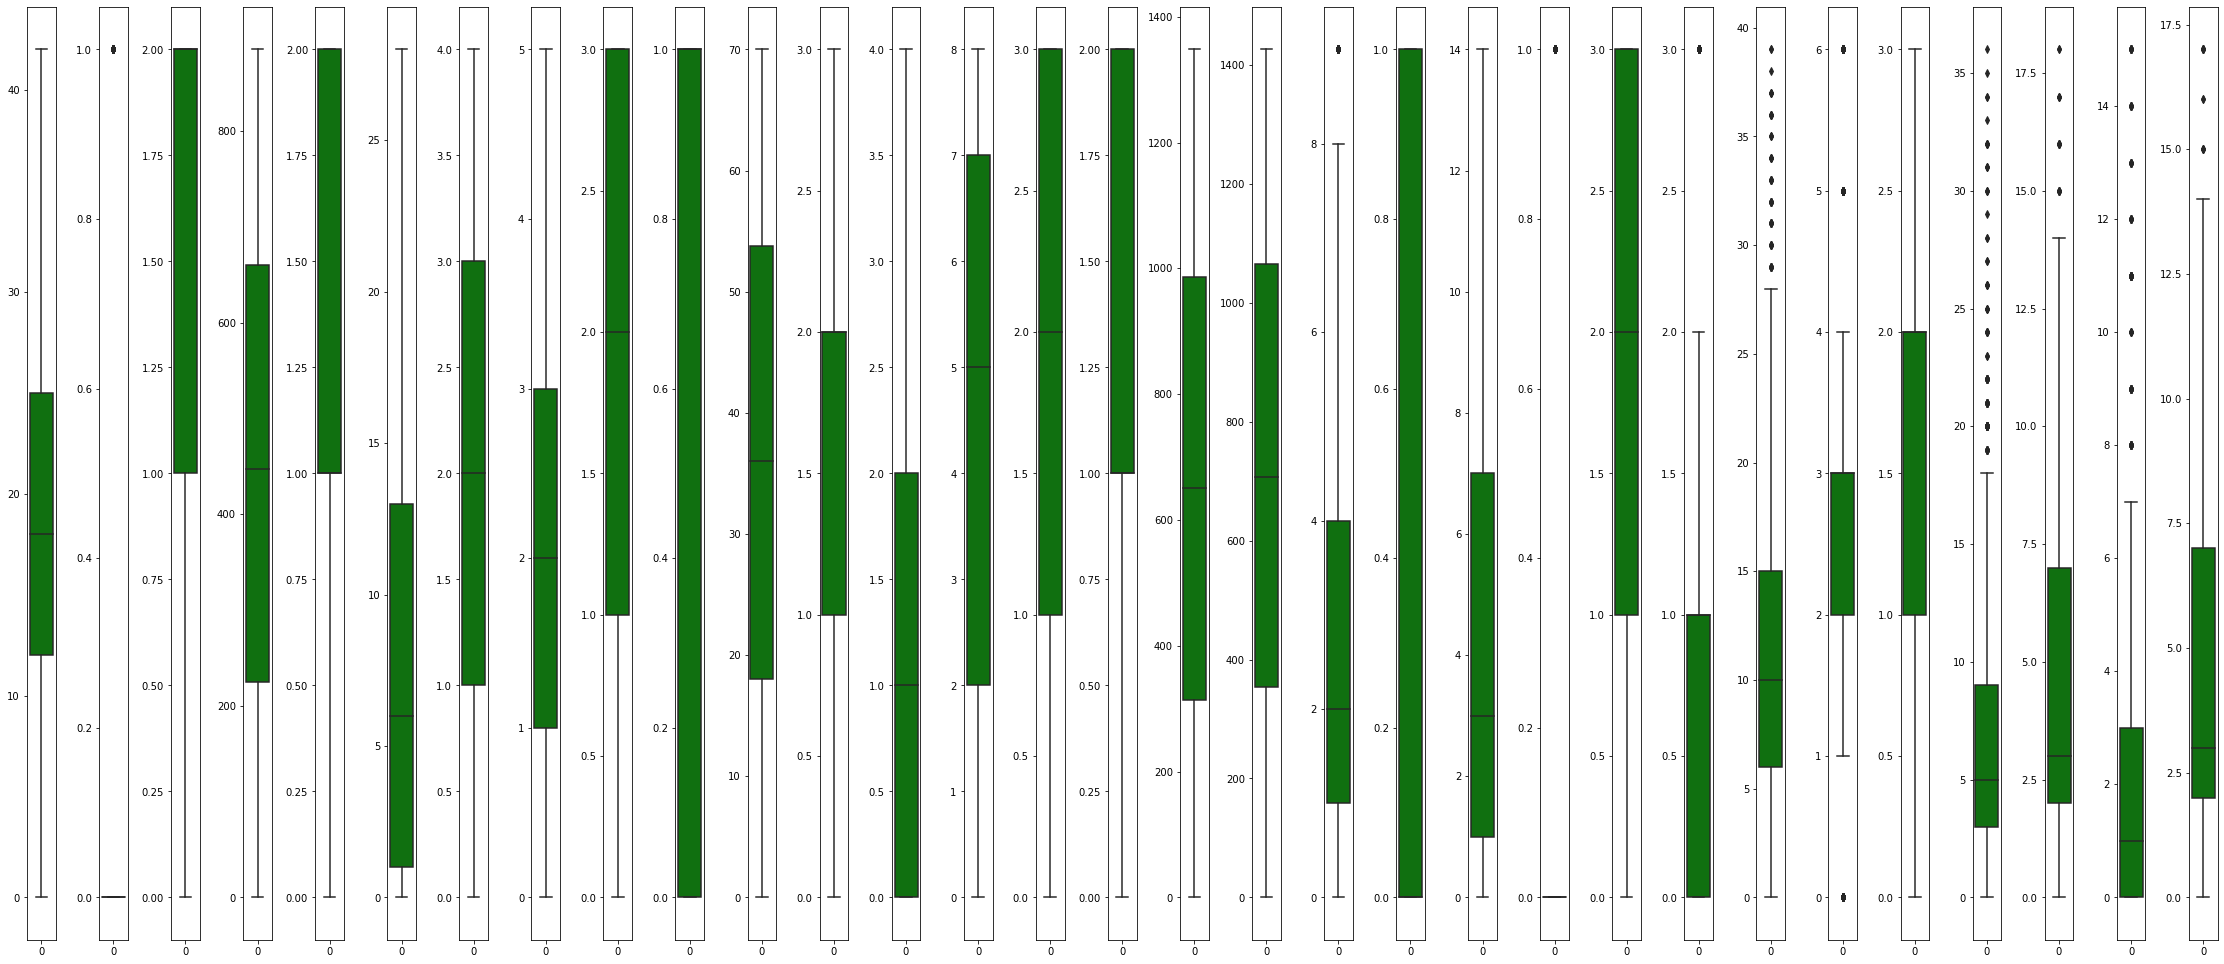

In [95]:
col_list = Attrition_data.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = Attrition_data[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

In [96]:
# Observation: Here we can see that there are columns with the many number of the outliers are present in the columns - 
# 1)"YearsAtCompany", 2) "MonthlyIncome"  3) "TotalWorkingYears"  4)"YearsSinceLastPromotion"  5)"YearsWithCurrManager".

# Removing Outliers -  Using Z- Score method:

In [97]:
from scipy.stats import zscore
z = np.abs(zscore(Attrition_data))
z.shape

(1470, 31)

In [98]:
threshold = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [99]:
len(np.where(z>3))

2

In [100]:
len(np.where(z>3)[0])

110

In [101]:
Attrition_data_new = Attrition_data[(z<3).all(axis = 1)]
print(Attrition_data.shape)
print(Attrition_data_new.shape)

(1470, 31)
(1387, 31)


In [102]:
# observation: here we can see that there is reduce in the number of total records(rows) and so there is reduce in the data.

# loss percentage calculation:

In [103]:
loss_percent = (1470-1387)/1470*100
print(loss_percent)

5.646258503401361


In [104]:
# Observation: Here we can see that there is loss of 5.6% of the data , so it is negligible.

# Skewness:

In [105]:
Attrition_data_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.012403
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.112326
MonthlyRate                 0.024344
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [106]:
features = ["YearsAtCompany","TotalWorkingYears","YearsSinceLastPromotion","YearsWithCurrManager"]

In [107]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [108]:
Attrition_data_new[features] = scaler.fit_transform(Attrition_data_new[features].values)
Attrition_data_new[features]

,YearsAtCompany,TotalWorkingYears,YearsSinceLastPromotion,YearsWithCurrManager
0,0.231837,-0.173231,-1.073534,0.582177
1,0.948319,0.147620,0.193168,1.018073
2,-2.156089,-0.351153,-1.073534,-1.528426
3,0.621429,-0.173231,1.027520,-1.528426
4,-0.933983,-0.544046,0.722874,-0.347871
...,...,...,...,...
1465,0.003289,1.039364,-1.073534,0.018680
1466,0.436162,-0.007630,0.193168,1.018073
1467,0.231837,-0.544046,-1.073534,0.018680
1468,0.791264,1.039364,-1.073534,1.205782


In [109]:
Attrition_data_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.012403
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.112326
MonthlyRate                 0.024344
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [110]:
# Observation: Here we can see that there is change or we can say that reduce in the skewness of the data.

# Data Preprocessing:

## Separating independent and the target variables:

### train_test_split:

In [111]:
x = Attrition_data_new.drop("Attrition", axis=1)
y = Attrition_data_new["Attrition"]

In [112]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,1,0,64,...,0,0,0,-0.173231,0,0,0.231837,4,-1.073534,0.582177
1,31,1,113,1,7,0,1,2,1,31,...,1,3,1,0.147620,3,2,0.948319,7,0.193168,1.018073
2,19,2,805,1,1,1,4,3,1,62,...,0,1,0,-0.351153,3,2,-2.156089,0,-1.073534,-1.528426
3,15,1,820,1,2,3,1,3,0,26,...,0,2,0,-0.173231,3,2,0.621429,7,1.027520,-1.528426
4,9,2,312,1,1,0,3,0,1,10,...,0,3,1,-0.544046,3,2,-0.933983,2,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,494,1,22,1,3,2,1,11,...,0,2,1,1.039364,3,2,0.003289,2,-1.073534,0.018680
1466,21,2,327,1,5,0,3,3,1,12,...,0,0,1,-0.007630,5,2,0.436162,7,0.193168,1.018073
1467,9,2,39,1,3,2,1,1,1,57,...,1,1,1,-0.544046,0,2,0.231837,2,-1.073534,0.018680
1468,31,1,579,2,1,2,3,3,1,33,...,0,3,0,1.039364,3,1,0.791264,6,-1.073534,1.205782


In [113]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

### Scaling the x_data using standardscaler:

In [114]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.593126,0.705653,1.405373,-1.011249,-0.876177,-0.940815,-0.665328,-1.229911,1.388670,...,-0.424765,-1.575817,-0.929427,-0.173231,-2.171420,-2.501172,0.231837,0.040903,-1.073534,0.582177
1,1.442111,-0.905354,-1.312393,-0.496337,-0.145521,-1.853858,-0.940815,0.251978,0.813067,-0.239091,...,2.354241,1.199034,0.238250,0.147620,0.151871,0.336558,0.948319,0.965895,0.193168,1.018073
2,0.083966,0.593126,1.420460,-0.496337,-0.887573,-0.876177,1.305159,1.169285,0.813067,1.290017,...,-0.424765,-0.650866,-0.929427,-0.351153,0.151871,0.336558,-2.156089,-1.192419,-1.073534,-1.528426
3,-0.368749,-0.905354,1.479698,-0.496337,-0.763898,1.079185,-0.940815,1.169285,-1.229911,-0.485721,...,-0.424765,0.274084,-0.929427,-0.173231,0.151871,0.336558,0.621429,0.965895,1.027520,-1.528426
4,-1.047821,0.593126,-0.526501,-0.496337,-0.887573,-1.853858,0.556501,-1.582635,0.813067,-1.274939,...,-0.424765,1.199034,0.238250,-0.544046,0.151871,0.336558,-0.933983,-0.575758,0.722874,-0.347871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,-0.029213,-0.905354,0.192256,-0.496337,1.709609,-0.876177,0.556501,0.251978,0.813067,-1.225613,...,-0.424765,0.274084,0.238250,1.039364,0.151871,0.336558,0.003289,-0.575758,-1.073534,0.018680
1383,0.310324,0.593126,-0.467262,-0.496337,-0.392872,-1.853858,0.556501,1.169285,0.813067,-1.176286,...,-0.424765,-1.575817,0.238250,-0.007630,1.700732,0.336558,0.436162,0.965895,0.193168,1.018073
1384,-1.047821,0.593126,-1.604635,-0.496337,-0.640223,0.101504,-0.940815,-0.665328,0.813067,1.043387,...,2.354241,-0.650866,0.238250,-0.544046,-2.171420,0.336558,0.231837,-0.575758,-1.073534,0.018680
1385,1.442111,-0.905354,0.527938,1.405373,-0.887573,0.101504,0.556501,1.169285,0.813067,-0.140439,...,-0.424765,1.199034,-0.929427,1.039364,0.151871,-1.082307,0.791264,0.657565,-1.073534,1.205782


In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# Training the model:

In [116]:
# here we will use "forloop" for using models continously without getting interrupted:

In [117]:
models = {"LogisticRegression" : LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree"      : DecisionTreeClassifier(),
          "Random Forest"      : RandomForestClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(x_train,y_train)
    print(name + " is trained now.")

LogisticRegression is trained now.
K-Nearest Neighbors is trained now.
Decision Tree is trained now.
Random Forest is trained now.
Gradient Boosting is trained now.


# testing:

In [118]:
for name, model in models.items():
    print(name + ": {:,.2f}%".format(model.score(x_test,y_test)*100))

LogisticRegression: 85.85%
K-Nearest Neighbors: 84.65%
Decision Tree: 77.22%
Random Forest: 86.81%
Gradient Boosting: 86.57%


# HyperParameter tuning:

## GridSearchCV:

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,20],
             'max_depth':[2,4,6]}

# GradientBoostingClassifier:

In [121]:
# here we use "GradientBoostingClassifier" because this model has highest accuracy score when compared to the other models.

In [122]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [123]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 20]})

In [124]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 20}

In [125]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [126]:
parameters = {'criterion': ['mse','mae'], 'max_features': ['auto', 'sqrt', 'log2']}

GradientBoosting = GradientBoostingClassifier()
Classifier = GridSearchCV(GradientBoosting,parameters)
Classifier.fit(x_train,y_train)

print(Classifier.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [127]:
# observation: here we can see that the best_parameteers are selected.

In [128]:
GradientBoosting = GradientBoostingClassifier(criterion = 'mse', max_features = 'log2')
GradientBoosting.fit(x_train,y_train)
GradientBoosting.score(x_train,y_train)

pred_decision = GradientBoosting.predict(x_test)
GradientBoostingS = r2_score(y_test,pred_decision)
print('R2 Score:', GradientBoostingS*100)

GradientBoostingScore = cross_val_score(GradientBoosting,x,y,cv = 5)
GradientBoostingC = GradientBoostingScore.mean()
print("Cross Val Score:",GradientBoostingC*100)

R2 Score: 3.358334737906643
Cross Val Score: 87.09581071604809


In [129]:
# Observation: here we can see that the best parameters we got for the model.

In [130]:
GradientBoosting = GradientBoostingClassifier(criterion = 'mse', max_features = 'sqrt')
GradientBoosting.fit(x_train,y_train)
GradientBoosting.score(x_train,y_train)

pred_decision = GradientBoosting.predict(x_test)
GradientBoostingS = r2_score(y_test,pred_decision)
print('R2 Score:', GradientBoostingS*100)

GradientBoostingScore = cross_val_score(GradientBoosting,x,y,cv = 5)
GradientBoostingC = GradientBoostingScore.mean()
print("Cross Val Score:",GradientBoostingC*100)

R2 Score: 3.358334737906643
Cross Val Score: 86.5901358335714


# saving the model:

In [131]:
import pickle
filename = 'churn.pkl'
pickle.dump(GradientBoosting,open(filename, 'wb'))

In [132]:
loaded_model = pickle.load(open("churn.pkl", "rb"))
result = loaded_model.score(x_test, y_test)
print(result)

0.86810551558753


# conclusion:

In [133]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index = ["Predicted","Original"])

In [134]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,407,408,409,410,411,412,413,414,415,416
Predicted,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


So, therefore our best model is "GradientBoosting" and the percentage we achieved is 88% .